U-Net 是一种经典的卷积神经网络（CNN）架构，广泛应用于图像分割任务，特别是医学图像分割。它由德国弗赖堡大学的研究人员在2015年提出，目的是提高少量标注数据下的分割效果。U-Net 得名于其类似字母“U”形的结构，具有一个下采样的编码器部分和一个上采样的解码器部分，确保了网络能够从细节到全局地提取特征。

### U-Net 结构概述

1. **编码器（下采样）**：
   - 编码器部分通常由卷积层、ReLU 激活函数和池化层组成。它通过逐步缩小输入图像的空间尺寸来提取高层次特征（即提取图像的全局语义信息）。
   - 每经过一次池化操作，特征图的尺寸会减小一半，但特征的维度通常会加倍，这样可以在更深的网络层次上获得更丰富的特征表示。

2. **瓶颈层**：
   - 编码器部分和解码器部分之间是一个瓶颈层，通常包含一系列卷积操作，用于在最小的空间维度下提取高层次的抽象特征。

3. **解码器（上采样）**：
   - 解码器通过上采样（或反卷积）操作逐步恢复图像的空间分辨率。它的作用是根据编码器提取的特征图恢复图像的精细结构。
   - 解码器部分的每一层通常都会与对应编码器部分的特征图进行跳跃连接（skip connections）。

4. **跳跃连接（Skip Connections）**：
   - 跳跃连接是 U-Net 的核心特色之一。在解码器的每一层中，都会将编码器中相同分辨率的特征图与当前层的特征图进行拼接。这使得网络能够结合高分辨率的局部特征和低分辨率的语义特征，从而提升分割精度。

5. **输出层**：
   - 输出层通常是一个 1x1 的卷积层，用于将最终的特征图映射到所需的类别数（对于二分类问题，通常是1个通道）。

### 优点

- **精确的边界捕捉**：跳跃连接使得 U-Net 能够有效地捕捉到图像中的细节和边界信息，尤其适用于医学图像分割等精细任务。
- **少量数据训练**：U-Net 可以在相对较少的标注数据下训练得比较好，这是因为它通过跳跃连接利用了大量局部信息，减少了对大规模数据集的依赖。
- **端到端训练**：U-Net 可以进行端到端训练，即输入图像和目标分割图像直接作为训练数据。

### 应用

- **医学图像分割**：U-Net 在医学图像处理（如器官分割、肿瘤分割等）方面表现出色，能够从复杂的医学图像中提取精确的区域。
- **卫星图像分析**：U-Net 也常用于卫星图像中的地物分类或土地覆盖分类任务。
- **遥感图像分割**：同样，U-Net 在遥感领域用于地物识别和分割。

### 变体和改进

随着 U-Net 在不同任务中的应用，研究者提出了多种 U-Net 的改进版本，包括：

- **3D U-Net**：用于处理三维数据（如CT扫描），其结构类似于2D U-Net，但卷积和池化操作扩展到三维。
- **Attention U-Net**：引入了注意力机制，可以让网络关注图像中更重要的区域。
- **ResUNet**：结合了残差连接的 U-Net，有助于解决深层网络训练时的梯度消失问题。

总的来说，U-Net 是一种非常有效的图像分割架构，特别是在数据集相对较小的情况下，它能够通过其独特的结构和设计在许多领域取得优秀的分割性能。

Epoch 1/10: 100%|██████████| 186/186 [00:15<00:00, 11.81it/s]


Epoch [1/10], Loss: 0.3792, Accuracy: 0.7900


Epoch 2/10: 100%|██████████| 186/186 [00:15<00:00, 12.30it/s]


Epoch [2/10], Loss: 0.1953, Accuracy: 0.9225


Epoch 3/10: 100%|██████████| 186/186 [00:15<00:00, 12.19it/s]


Epoch [3/10], Loss: 0.1436, Accuracy: 0.9459


Epoch 4/10: 100%|██████████| 186/186 [00:15<00:00, 12.26it/s]


Epoch [4/10], Loss: 0.1370, Accuracy: 0.9472


Epoch 5/10: 100%|██████████| 186/186 [00:15<00:00, 11.92it/s]


Epoch [5/10], Loss: 0.1344, Accuracy: 0.9480


Epoch 6/10: 100%|██████████| 186/186 [00:15<00:00, 12.25it/s]


Epoch [6/10], Loss: 0.1304, Accuracy: 0.9490


Epoch 7/10: 100%|██████████| 186/186 [00:15<00:00, 12.39it/s]


Epoch [7/10], Loss: 0.1304, Accuracy: 0.9487


Epoch 8/10: 100%|██████████| 186/186 [00:15<00:00, 12.36it/s]


Epoch [8/10], Loss: 0.1282, Accuracy: 0.9496


Epoch 9/10: 100%|██████████| 186/186 [00:14<00:00, 12.49it/s]


Epoch [9/10], Loss: 0.1264, Accuracy: 0.9501


Epoch 10/10: 100%|██████████| 186/186 [00:15<00:00, 12.21it/s]


Epoch [10/10], Loss: 0.1254, Accuracy: 0.9502


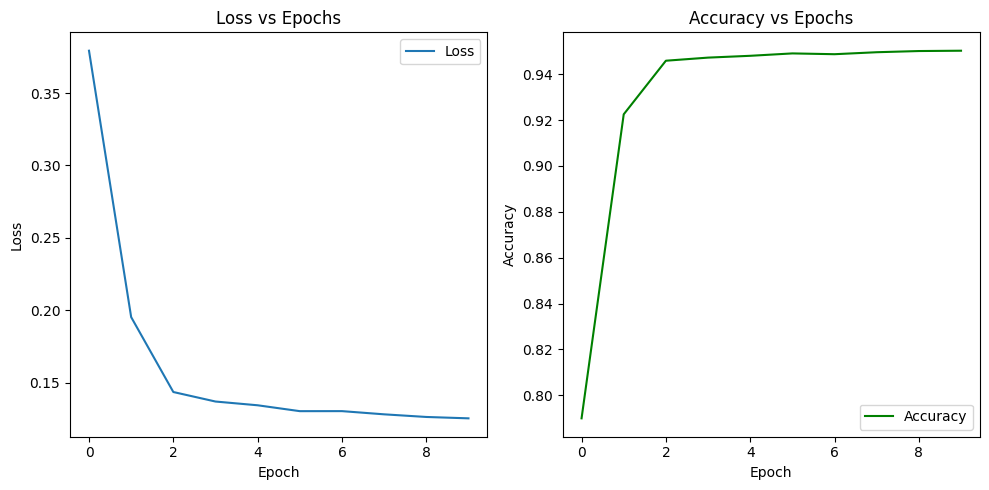

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# UNet网络模型定义（与原始代码保持一致）
class UNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=1):
        super(UNet, self).__init__()

        # 编码器部分（Encoder）
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # 中间部分（Middle）
        self.middle = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # 解码器部分（Decoder）
        self.decoder = nn.Sequential(
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, 64, kernel_size=2, stride=2),  # 上采样
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, out_channels, kernel_size=2, stride=2)  # 再次上采样
        )
        
        # 最终的1x1卷积层
        self.final_conv = nn.Conv2d(out_channels, out_channels, kernel_size=1)

    def forward(self, x):
        x1 = self.encoder(x)
        x2 = self.middle(x1)
        x3 = self.decoder(x2)
        return self.final_conv(x3)

# 数据集定义（与原始代码保持一致）
class TargetDetectionDataset(Dataset):
    def __init__(self, img_folder, label_folder, transform=None):
        self.img_folder = img_folder
        self.label_folder = label_folder
        self.transform = transform
        self.img_paths = sorted(os.listdir(img_folder))
        self.label_paths = sorted(os.listdir(label_folder))

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_folder, self.img_paths[idx])
        label_path = os.path.join(self.label_folder, self.label_paths[idx])

        img = Image.open(img_path).convert('RGB')
        label = Image.open(label_path).convert('L')  # 灰度图像
        
        # 统一调整图像和标签的尺寸
        img = img.resize((256, 256))
        label = label.resize((256, 256))
        
        if self.transform:
            img = self.transform(img)
            label = self.transform(label)
        
        # 标签二值化处理
        label = (label > 0).float()  # 变为二值标签 (0或1)
        
        return img, label

# 数据转换
transform = transforms.Compose([
    transforms.ToTensor(),
])

# 准确率计算函数
def compute_accuracy(outputs, labels):
    # 将输出值转换为0或1
    predicted = (torch.sigmoid(outputs) > 0.5).float()
    correct = (predicted == labels).float()
    accuracy = correct.sum() / correct.numel()
    return accuracy

# 训练函数，记录损失和准确率
def train(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    
    # 用于记录损失和准确率
    epoch_losses = []
    epoch_accuracies = []
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        running_accuracy = 0.0
        
        for imgs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            imgs, labels = imgs.cuda(), labels.cuda()

            optimizer.zero_grad()

            outputs = model(imgs)
            loss = criterion(outputs, labels)  # 移除unsqueeze(1)操作
            loss.backward()
            optimizer.step()

            # 计算当前batch的准确率
            accuracy = compute_accuracy(outputs, labels)
            
            running_loss += loss.item()
            running_accuracy += accuracy.item()

        # 计算每个epoch的平均损失和准确率
        epoch_losses.append(running_loss / len(train_loader))
        epoch_accuracies.append(running_accuracy / len(train_loader))

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {running_accuracy/len(train_loader):.4f}")

    return epoch_losses, epoch_accuracies

# 数据加载
train_dataset = TargetDetectionDataset(
    img_folder='img',
    label_folder='label',
    transform=transform
)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# 初始化模型
model = UNet(in_channels=3, out_channels=1).cuda()

# 设置损失函数和优化器
criterion = nn.BCEWithLogitsLoss()  # 二分类损失函数
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# 训练模型并记录损失和准确率
epoch_losses, epoch_accuracies = train(model, train_loader, criterion, optimizer, num_epochs=10)

# 绘制loss-epoch曲线
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epoch_losses, label='Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 绘制accuracy-epoch曲线
plt.subplot(1, 2, 2)
plt.plot(epoch_accuracies, label='Accuracy', color='green')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
